In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

In [3]:
stop_wrods = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [4]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [5]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer, IndexedString, IndexedCharacters, explanation
from lime.lime_base import LimeBase

sns.set(font_scale=1.3)
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anshs\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
df_train = pd.read_csv('D:/CVR_MINI_PROG/text_data/train.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv('D:/CVR_MINI_PROG/text_data/val.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('D:/CVR_MINI_PROG/text_data/test.txt', names=['Text', 'Emotion'], sep=';')

In [7]:
df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [8]:
df_train['Emotion'].value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [9]:
print(df_test.shape)
df_test.head()

(2000, 2)


,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [10]:
print(df_val.shape)
df_val.head()

(2000, 2)


,Text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [11]:
df_train['Emotion'].value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [12]:
df_train['Emotion'].value_counts() / df_train.shape[0] * 100

Emotion
joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: count, dtype: float64

<Axes: xlabel='Emotion', ylabel='count'>

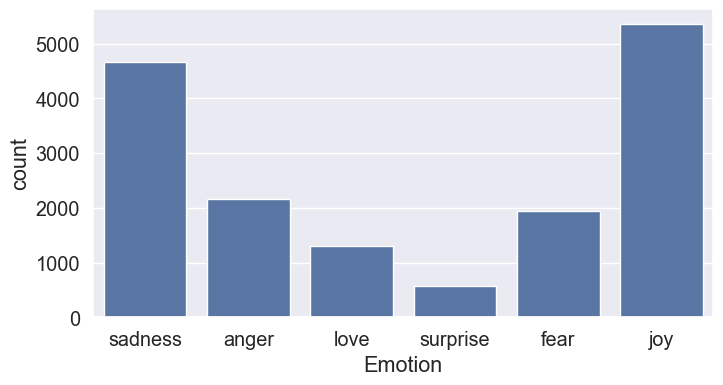

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Emotion', data=df_train)

In [14]:
df_train.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [15]:
df_train.duplicated().sum()

1

In [16]:
index = df_train[df_train.duplicated() == True].index
df_train.drop(index, axis=0, inplace=True)
df_train.reset_index(inplace=True, drop=True)

In [17]:
df_train[df_train.duplicated() == True].index

Index([], dtype='int64')

In [18]:
df_train[df_train['Text'].duplicated() == True]

,Text,Emotion
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


In [19]:
df_train[df_train['Text'] == df_train.iloc[7623]['Text']]

,Text,Emotion
1625,i was intensely conscious of how much cash i h...,anger
7623,i was intensely conscious of how much cash i h...,sadness


In [20]:
index = df_train[df_train['Text'].duplicated() == True].index
df_train.drop(index, axis=0, inplace=True)
df_train.reset_index(inplace=True, drop=True)

In [21]:
df_train[df_train['Text'].duplicated() == True]

,Text,Emotion


In [22]:
temp = df_train.copy()
stop_words = set(stopwords.words('english'))
temp['stop_words'] = temp['Text'].apply(lambda x : len(set(x.split()) & set(stop_words)))
temp['stop_words'].value_counts()

stop_words
5     1416
7     1405
6     1392
4     1341
8     1319
3     1263
9     1177
10    1048
2      922
11     889
12     752
13     644
14     493
1      450
15     376
16     265
17     238
18     164
19     113
20      90
0       79
21      60
22      33
23      19
24       7
25       6
26       6
28       1
29       1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

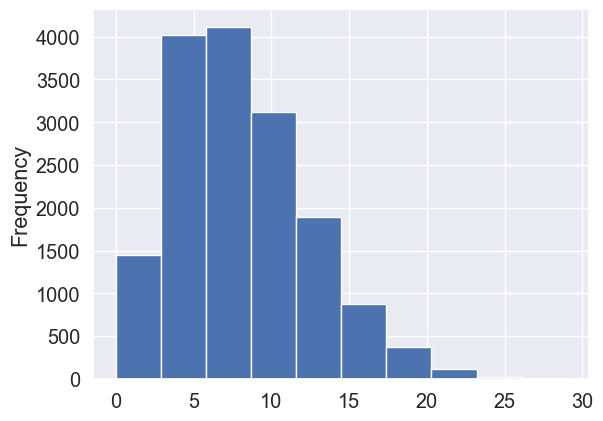

In [23]:
temp['stop_words'].plot(kind='hist')

In [24]:
df_test['Emotion'].value_counts()

Emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

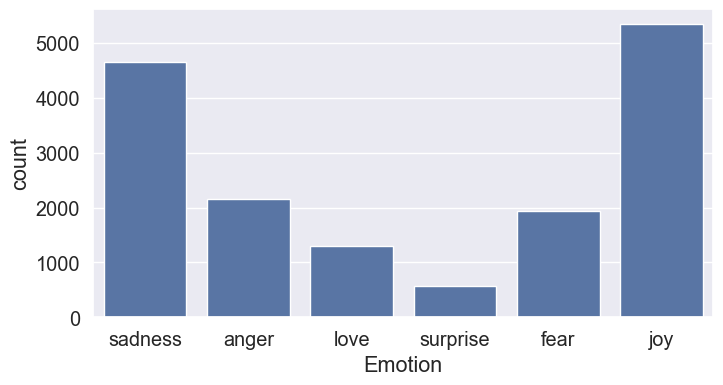

In [25]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_train, x='Emotion')

In [26]:
df_test.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [27]:
df_test.duplicated().sum()

0

In [28]:
df_test[df_test['Text'].duplicated() == True].index

Index([], dtype='int64')

In [29]:
temp = df_test.copy()
temp['stop_words'] = temp['Text'].apply(lambda x : len(set(x.split()) & set(stop_words)))
temp['stop_words'].value_counts()

stop_words
7     184
6     179
3     175
5     175
4     163
9     163
8     139
10    123
2     118
11    115
12     84
13     71
15     61
14     58
1      42
16     40
17     31
18     22
20     17
19     11
21     10
0       8
23      7
24      2
22      2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

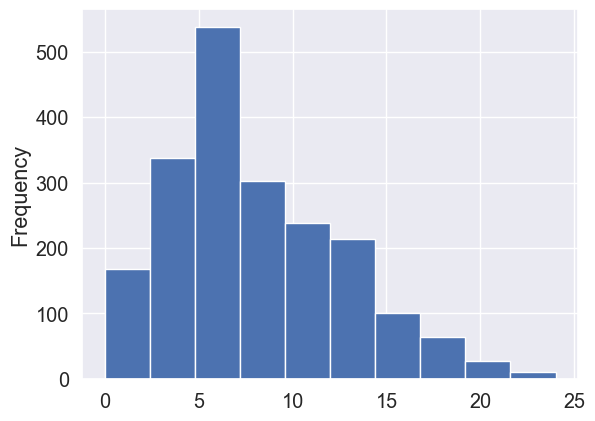

In [30]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind='hist')

In [31]:
!python --version

Python 3.12.3


In [32]:
df_val['Emotion'].value_counts()

Emotion
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

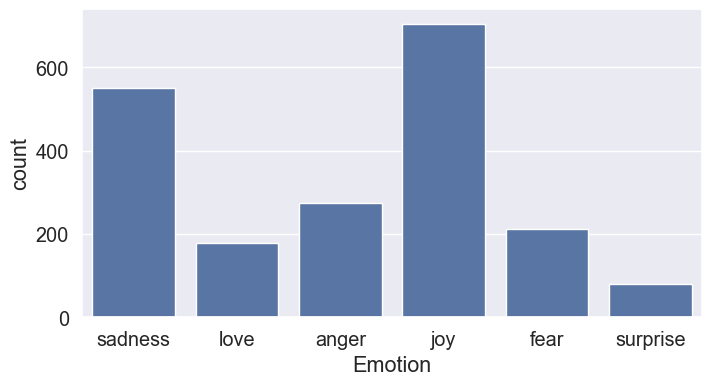

In [33]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_val, x='Emotion')

In [34]:
df_val.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [35]:
df_val.duplicated().sum()

0

In [36]:
df_val[df_val['Text'].duplicated() == True]

,Text,Emotion
603,i have had several new members tell me how com...,joy
1993,i feel so tortured by it,anger


In [37]:
df_val[df_val['Text'] == df_val.iloc[603]['Text']] 

,Text,Emotion
300,i have had several new members tell me how com...,love
603,i have had several new members tell me how com...,joy


In [38]:
df_val[df_val['Text'] == df_val.iloc[1993]['Text']] 

,Text,Emotion
774,i feel so tortured by it,fear
1993,i feel so tortured by it,anger


In [39]:
index = df_val[df_val['Text'].duplicated() == True].index
df_val.drop(index, axis=0, inplace=True)
df_val.reset_index(inplace=True, drop=True)

In [40]:
df_val[df_val['Text'].duplicated() == True]

,Text,Emotion


In [41]:
temp = df_val.copy()
temp['stop_words'] = temp['Text'].apply(lambda x : len(set(stop_words) & set(x.split())))
temp['stop_words'].value_counts()

stop_words
7     190
5     175
8     173
6     160
3     160
10    150
9     146
4     145
2     133
11    103
12     76
13     74
1      64
14     63
15     44
16     36
17     31
18     21
19     16
20     16
0      11
21      6
22      3
23      2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

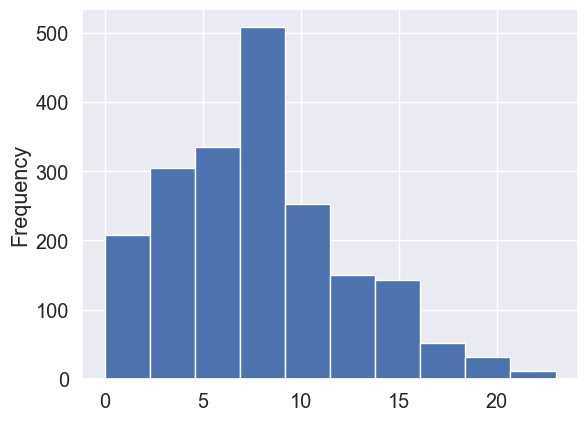

In [42]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind='hist')

In [43]:
def dataframe_difference(df1, df2, which=None):
    comparision_df = df1.merge(
        df2, 
        indicator=True,
        how='outer'
    )
    
    if which is None:
        diff_df = comparision_df[comparision_df['_merge'] != 'both']
    else:
        diff_df = comparision_df[comparision_df['_merge'] == which]
        
    return diff_df

In [44]:
dataframe_difference(df_train, df_test, 'both')

,Text,Emotion,_merge


In [45]:
dataframe_difference(df_train, df_val, which='both')

,Text,Emotion,_merge


In [46]:
dataframe_difference(df_val, df_test, which='both')

,Text,Emotion,_merge


In [47]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')  # Add this line to download WordNet

lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anshs\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anshs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]
    
    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    
    text = text.split()

    text=[y.lower() for y in text]
    
    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan
            
def normalize_text(df):
    df.Text=df.Text.apply(lambda text : lower_case(text))
    df.Text=df.Text.apply(lambda text : remove_stop_words(text))
    df.Text=df.Text.apply(lambda text : Removing_numbers(text))
    df.Text=df.Text.apply(lambda text : Removing_punctuations(text))
    df.Text=df.Text.apply(lambda text : Removing_urls(text))
    df.Text=df.Text.apply(lambda text : lemmatization(text))
    return df

def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

<>:29: SyntaxWarning: invalid escape sequence '\]'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\]'
<>:33: SyntaxWarning: invalid escape sequence '\s'
C:\Users\anshs\AppData\Local\Temp\ipykernel_19544\1722713920.py:29: SyntaxWarning: invalid escape sequence '\]'
  text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
C:\Users\anshs\AppData\Local\Temp\ipykernel_19544\1722713920.py:33: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)


In [49]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [50]:
normalized_sentence("My Name is Mohamed. @Tweets,  plays 2022  Egypt_")

'name mohamed tweet play egypt'

In [51]:
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)


In [52]:
df_train.head()

,Text,Emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger


In [53]:
X_train = df_train['Text']
y_train = df_train['Emotion']

X_test = df_test['Text']
y_test = df_test['Emotion']

X_val = df_val['Text']
y_val = df_val['Emotion']

In [54]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [55]:
print(set(y_train))

{0, 1, 2, 3, 4, 5}


In [56]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [57]:
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

In [58]:
tokenizer.word_counts

OrderedDict([('didnt', 304),
             ('feel', 12920),
             ('humiliated', 59),
             ('go', 492),
             ('feeling', 6139),
             ('hopeless', 68),
             ('damned', 4),
             ('hopeful', 67),
             ('around', 347),
             ('someone', 295),
             ('care', 132),
             ('awake', 21),
             ('im', 2736),
             ('grabbing', 6),
             ('minute', 71),
             ('post', 146),
             ('greedy', 75),
             ('wrong', 85),
             ('ever', 247),
             ('nostalgic', 55),
             ('fireplace', 3),
             ('know', 977),
             ('still', 660),
             ('property', 4),
             ('grouchy', 29),
             ('ive', 659),
             ('little', 831),
             ('burdened', 67),
             ('lately', 107),
             ('wasnt', 107),
             ('sure', 270),
             ('taking', 102),
             ('milligram', 1),
             ('time', 1090),


In [59]:
tokenizer.document_count

17969

In [60]:
tokenizer.word_index['go']

31

In [61]:
tokenizer.texts_to_sequences(X_train[0].split())

[[53], [2], [531]]

In [62]:
tokenizer.texts_to_matrix(X_train[0].split()).shape

(3, 14325)

In [63]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

In [64]:
len(sequences_train)

15969

In [65]:
max_len = max([len(text) for text in df_train['Text']])
max_len

229

In [66]:
X_train = pad_sequences(sequences_train, maxlen=max_len, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=max_len, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=max_len, truncating='pre')

In [67]:
vocabSize = len(tokenizer.index_word) + 1
print(f"The vocab size is {vocabSize}")

The vocab size is 14325


In [68]:
path_to_glove_file = 'D:/CVR_MINI_PROG/text_data/golve/glove.6B.200d.txt'
num_tokens = vocabSize
embedding_dim = 200
hits = 0
misses = 0
embedding_index = {}

In [69]:
with open(path_to_glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embedding_index[word] = coefs

print(f"Found {len(embedding_index)} word vectors")

embedding_matrix = np.zeros((num_tokens, embedding_dim ))

for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

print(f"Converted {hits} word, missed {misses} words")

Found 400000 word vectors
Converted 13243 word, missed 1081 words


In [70]:
adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(6, activation='softmax'))

model.build(
    input_shape=(None, X_train.shape[1])
)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

c:\Users\anshs\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 229, 200)       │     2,865,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 229, 512)       │       935,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 229, 256)       │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,853,102 (18.51 MB)

 Trainable params: 1,988,102 (7.58 MB)

 Non-trainable params: 2,865,000 (10.93 MB)

In [71]:
callback = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

In [72]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=True,
    batch_size=256,
    epochs=30,
    callbacks=[callback]
)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 275s 4s/step - accuracy: 0.4235 - loss: 1.5004 - val_accuracy: 0.7012 - val_loss: 0.8219
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 272s 4s/step - accuracy: 0.7579 - loss: 0.7005 - val_accuracy: 0.8829 - val_loss: 0.3226
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 275s 4s/step - accuracy: 0.8777 - loss: 0.3247 - val_accuracy: 0.9109 - val_loss: 0.2105
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 279s 4s/step - accuracy: 0.9177 - loss: 0.2057 - val_accuracy: 0.9219 - val_loss: 0.1849
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 292s 5s/step - accuracy: 0.9276 - loss: 0.1669 - val_accuracy: 0.9354 - val_loss: 0.1418
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 283s 4s/step - accuracy: 0.9427 - loss: 0.1285 - val_accuracy: 0.9329 - val_loss: 0.1449
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 284s 5s/step - accuracy: 0.9477 - loss: 0.1145 - val_accuracy: 0.9339 - val_loss: 0.1429
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 285s 5s/step - accuracy: 0.9499 - loss: 0.1072 - val_accuracy: 0.9309 - v

In [73]:
model.save('text.h5')

In [74]:
import pickle

# Save the entire model using Pickle
with open("text.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as a Pickle file: model_pickle.pkl")

Model saved as a Pickle file: model_pickle.pkl


In [75]:
model.evaluate(X_val, y_val, verbose=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.9390 - loss: 0.1208


[0.13108132779598236, 0.9394394159317017]

In [76]:
predicted = model.predict(X_test)
y_pred = predicted.argmax(axis=-1)

print(classification_report(le.transform(df_test['Emotion']), y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       275
           1       0.88      0.92      0.90       224
           2       0.99      0.90      0.94       695
           3       0.76      0.99      0.86       159
           4       0.97      0.97      0.97       581
           5       0.75      0.71      0.73        66

    accuracy                           0.93      2000
   macro avg       0.88      0.91      0.89      2000
weighted avg       0.93      0.93      0.93      2000



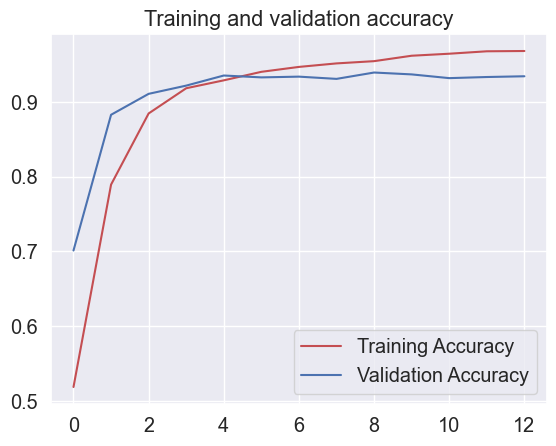

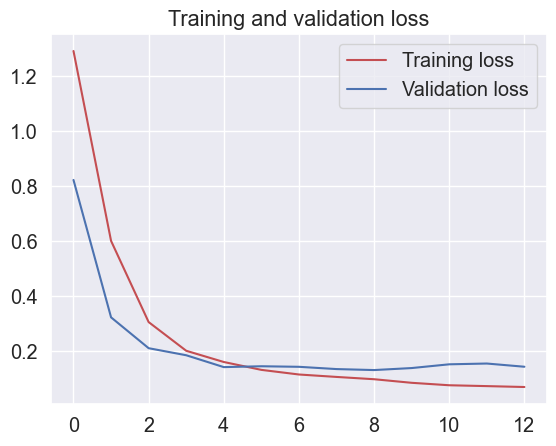

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step


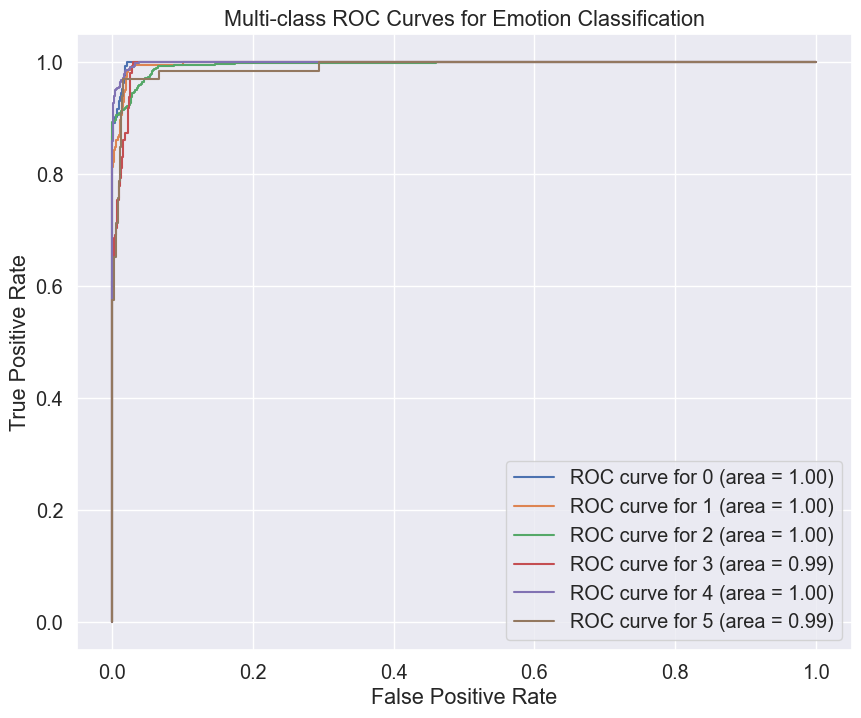

In [79]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Define your classes based on your emotion labels
emotion_classes = [0, 1, 2, 3, 4, 5]  # Replace with numeric encoding for sadness, anger, love, etc.
y_test_binarized = label_binarize(y_test, classes=emotion_classes)

# Predict probabilities with your model
predictions = model.predict(X_test)  

# Plotting ROC for each emotion
plt.figure(figsize=(10, 8))
for i in range(len(emotion_classes)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"ROC curve for {emotion_classes[i]} (area = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curves for Emotion Classification")
plt.legend(loc="lower right")
plt.show()


In [ ]:
model.save('Emotion Recognition From English text.h5')